In [1]:
import sys
sys.path.append('../scripts')

In [2]:
import logging
import glob
import pandas as pd
import nltk
import os

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.callbacks import PerplexityMetric
from gensim.models.wrappers import LdaMallet
from utils import is_punct

TOKENIZER = nltk.tokenize.word_tokenize

In [3]:
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

In [4]:
CORPUS_PATH = '../corpus/VARDnormalized/varded50/*.txt'
stop_words_path = '../stoplists/stoplist_VARD2.txt'
stop_words = [s.lower() for s in open(stop_words_path, 'r', encoding='utf-8').read().splitlines()]

NO_BELOW = 2 #minimum document frequency
NO_ABOVE = 1 #maximum document frequency

N_TOPICS = 50
ITERATIONS = 2000
OPTIMIZE_INTERVAL = 20
EVAL_EVERY = 3 # for regular LDA 
N_WORKERS = 3 # number of CPU'S for multiprocessing

In [5]:
remove_stopwords = lambda x: [word.lower() for word in x if word.lower() not in stop_words and not is_punct(word) and len(word) > 1]

texts = glob.glob(CORPUS_PATH, recursive=False)
tokenized_texts = [TOKENIZER(open(text, "r", encoding="utf-8").read(), language="dutch") for text in texts]
tokenized_texts = [remove_stopwords(text) for text in tokenized_texts]

In [6]:
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=NO_BELOW, no_above=NO_ABOVE)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : adding document #10000 to Dictionary(118089 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...)
INFO : adding document #20000 to Dictionary(181074 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...)
INFO : built Dictionary(193867 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...) from 22297 documents (total 3114564 corpus positions)
INFO : discarding 116848 tokens: [('aartsverraders', 1), ('blixemvuur', 1), ('bruissend', 1), ('hemelvieren', 1), ('ghesondicheit', 1), ('toekommenden', 1), ('prijcek', 1), ('koutheydt', 1), ('meghedeylt', 1), ('dispose', 1)]...
INFO : keeping 77019 tokens which were in no less than 2 and no more than 22297 (=100.0%) documents
INFO : resulting dictionary: Dictionary(77019 unique tokens: ['aards', 'af', 'binden', 'durft', 'dwaze']...)


In [9]:
lda = LdaMallet('/Users/alielassche/applications/mallet-2.0-4.8/bin/mallet', 
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS, 
                iterations=ITERATIONS,  
                workers=N_WORKERS,
                optimize_interval=OPTIMIZE_INTERVAL)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_corpus.mallet --num-topics 50  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/8500a7_topickeys.txt --num-iterations 2000 --inf

In [10]:
from gensim.models import CoherenceModel

# Compute Coherence score
coherence_model_ldamallet = CoherenceModel(model=lda, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO : 1 batches submitted to accumulate stats from 64 documents (1726 virtual)
INFO : 2 batches submitted to accumulate stats from 128 documents (3965 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (4716 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (7327 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (9313 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (12881 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (15630 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (15798 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (17689 virtual)
INFO : 10 batches submitted to accumulate stats from 640 documents (19916 virtual)
INFO : 11 batches submitted to accumulate stats from 704 docume

INFO : 97 batches submitted to accumulate stats from 6208 documents (192478 virtual)
INFO : 98 batches submitted to accumulate stats from 6272 documents (195270 virtual)
INFO : 99 batches submitted to accumulate stats from 6336 documents (197969 virtual)
INFO : 100 batches submitted to accumulate stats from 6400 documents (198495 virtual)
INFO : 101 batches submitted to accumulate stats from 6464 documents (200552 virtual)
INFO : 102 batches submitted to accumulate stats from 6528 documents (202925 virtual)
INFO : 103 batches submitted to accumulate stats from 6592 documents (205441 virtual)
INFO : 104 batches submitted to accumulate stats from 6656 documents (207617 virtual)
INFO : 105 batches submitted to accumulate stats from 6720 documents (209609 virtual)
INFO : 106 batches submitted to accumulate stats from 6784 documents (211014 virtual)
INFO : 107 batches submitted to accumulate stats from 6848 documents (212796 virtual)
INFO : 108 batches submitted to accumulate stats from 691

INFO : 193 batches submitted to accumulate stats from 12352 documents (377620 virtual)
INFO : 194 batches submitted to accumulate stats from 12416 documents (379517 virtual)
INFO : 195 batches submitted to accumulate stats from 12480 documents (380860 virtual)
INFO : 196 batches submitted to accumulate stats from 12544 documents (381429 virtual)
INFO : 197 batches submitted to accumulate stats from 12608 documents (383276 virtual)
INFO : 198 batches submitted to accumulate stats from 12672 documents (384487 virtual)
INFO : 199 batches submitted to accumulate stats from 12736 documents (385931 virtual)
INFO : 200 batches submitted to accumulate stats from 12800 documents (387675 virtual)
INFO : 201 batches submitted to accumulate stats from 12864 documents (390767 virtual)
INFO : 202 batches submitted to accumulate stats from 12928 documents (391747 virtual)
INFO : 203 batches submitted to accumulate stats from 12992 documents (394246 virtual)
INFO : 204 batches submitted to accumulate 

INFO : 288 batches submitted to accumulate stats from 18432 documents (563677 virtual)
INFO : 289 batches submitted to accumulate stats from 18496 documents (564679 virtual)
INFO : 290 batches submitted to accumulate stats from 18560 documents (565719 virtual)
INFO : 291 batches submitted to accumulate stats from 18624 documents (567393 virtual)
INFO : 292 batches submitted to accumulate stats from 18688 documents (570875 virtual)
INFO : 293 batches submitted to accumulate stats from 18752 documents (573450 virtual)
INFO : 294 batches submitted to accumulate stats from 18816 documents (574631 virtual)
INFO : 295 batches submitted to accumulate stats from 18880 documents (577010 virtual)
INFO : 296 batches submitted to accumulate stats from 18944 documents (578471 virtual)
INFO : 297 batches submitted to accumulate stats from 19008 documents (580796 virtual)
INFO : 298 batches submitted to accumulate stats from 19072 documents (584362 virtual)
INFO : 299 batches submitted to accumulate 


Coherence Score:  0.4955303184840657


In [16]:
#compute coherence score for VARD-corpus

#removed start=2, step=3

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet('/Users/alielassche/applications/mallet-2.0-4.8/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations=ITERATIONS,  
                workers=N_WORKERS, optimize_interval=OPTIMIZE_INTERVAL)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_texts, start=10, limit=30, step=10)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/203e99_topickeys.txt --num-iterations 2000 --inf

In [14]:
# Show graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

limit=110; start=10; step=10;
x = range(start, limit, step)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
#plt.savefig('coherence_values_2_10_100.pdf')

NameError: name 'coherence_values' is not defined

In [11]:
rows = []
for topic in range(0, N_TOPICS):
    words = lda.show_topic(topic)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))
    rows.append([str(topic), topic_n_words])
keys = pd.DataFrame(rows, columns=['topic', 'words'])

Topic 0: gods christus zullen god hoort heren woord klaar moeten vrienden
Topic 1: ziel god mijne hert mijnen ziele geest zonden ogen mijns
Topic 2: min liefde nog hart ziel hert leven dog vreugd schone
Topic 3: venus schoonheid zoete licht glans gezicht zon ogen wiens schone
Topic 4: god lof hemel boven hoog hemels gods heren zijne zijnen
Topic 5: land prins vijand stad held koning veld lang vorst bloed
Topic 6: zich god hert ren vw er zijns lijck dies heil
Topic 7: geld man boer enen sou huis er vrouw mee wijf
Topic 8: zich elk reden ieder recht mens 'er geld eigen weet
Topic 9: naa god word wild ziel jezus gemoed leven nog noit
Topic 10: dijn dij du mit god dijnen dijne wt dynen recht
Topic 11: god gods woord kwaad mens wet recht mensen hert leven
Topic 12: vreugd lust rust hert zoete deugd vreugde verheugt jeugd ziel
Topic 13: god hemels godes sint gods hart maagd ziel grote deughden
Topic 14: waren kwamen stad kwam graaf mof hadden god paus binnen
Topic 15: hun god leven geven qua

In [11]:
keys.to_csv('VARD2_keys.csv', sep='\t')

In [21]:
transformed_docs = lda.load_document_topics()
docs = [[texts[indx]] + [p[1] for p in doc] for indx, doc in enumerate(transformed_docs)]
composition = pd.DataFrame(docs, columns=['document_id'] + ['topic {}'.format(x) for x in range(0, N_TOPICS)])

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/67164_doctopics.txt'

In [13]:
composition.head()

,document_id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,Corpus/VARDnormalized/varded50/186989.txt,0.001133,0.000460,0.000571,0.001334,0.000532,0.000356,0.000333,0.167554,0.000240,...,0.000428,0.000077,0.000629,0.000034,0.000330,0.000058,0.000728,0.000524,0.015967,0.000897
1,Corpus/VARDnormalized/varded50/3644.txt,0.000609,0.000247,0.081496,0.041311,0.000286,0.000191,0.000179,0.000706,0.633403,...,0.000230,0.000041,0.000338,0.000018,0.000177,0.000031,0.008510,0.000282,0.000459,0.000482
2,Corpus/VARDnormalized/varded50/38949.txt,0.000580,0.038945,0.000292,0.008425,0.000272,0.000183,0.000170,0.000673,0.000123,...,0.000219,0.000039,0.000322,0.000017,0.000169,0.000030,0.000373,0.000268,0.000438,0.000459
3,Corpus/VARDnormalized/varded50/114233.txt,0.091450,0.000276,0.000343,0.000801,0.463242,0.000214,0.000200,0.000789,0.000144,...,0.000257,0.000046,0.000378,0.000020,0.000198,0.000035,0.000437,0.000315,0.254667,0.009615
4,Corpus/VARDnormalized/varded50/19987.txt,0.000727,0.000295,0.000366,0.000856,0.000341,0.000229,0.000213,0.000843,0.000154,...,0.000274,0.000049,0.000403,0.978993,0.000212,0.000037,0.000467,0.000336,0.000548,0.000575


In [14]:
composition[['path', 'songid']] = composition.document_id.str.split('varded50/', expand=True)
composition = composition.drop(columns=['document_id', 'path'])
composition[['id', 'txt']] = composition.songid.str.split('.', expand=True)
composition = composition.drop(columns=['songid', 'txt'])

In [15]:
col_names = ([f'topic {i}' for i in range(0, 50)])
col_names.insert(0, 'id')
composition = composition[col_names]

In [16]:
composition.head()

,id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,186989,0.001133,0.000460,0.000571,0.001334,0.000532,0.000356,0.000333,0.167554,0.000240,...,0.000428,0.000077,0.000629,0.000034,0.000330,0.000058,0.000728,0.000524,0.015967,0.000897
1,3644,0.000609,0.000247,0.081496,0.041311,0.000286,0.000191,0.000179,0.000706,0.633403,...,0.000230,0.000041,0.000338,0.000018,0.000177,0.000031,0.008510,0.000282,0.000459,0.000482
2,38949,0.000580,0.038945,0.000292,0.008425,0.000272,0.000183,0.000170,0.000673,0.000123,...,0.000219,0.000039,0.000322,0.000017,0.000169,0.000030,0.000373,0.000268,0.000438,0.000459
3,114233,0.091450,0.000276,0.000343,0.000801,0.463242,0.000214,0.000200,0.000789,0.000144,...,0.000257,0.000046,0.000378,0.000020,0.000198,0.000035,0.000437,0.000315,0.254667,0.009615
4,19987,0.000727,0.000295,0.000366,0.000856,0.000341,0.000229,0.000213,0.000843,0.000154,...,0.000274,0.000049,0.000403,0.978993,0.000212,0.000037,0.000467,0.000336,0.000548,0.000575


In [17]:
composition.to_csv('VARD2_topics.csv', sep='\t')

In [2]:
import pandas as pd

In [3]:
composition = pd.read_csv('VARD2_topics.csv', sep='\t', index_col='id').drop(columns=['Unnamed: 0'])
composition.head()

FileNotFoundError: File b'VARD2_topics.csv' does not exist

In [29]:
x = pd.DataFrame(composition).T

In [30]:
import numpy as np

In [31]:
rslt = pd.DataFrame(np.zeros((0,3)), columns=['top1','top2','top3'])
for i in x.columns:
    df1row = pd.DataFrame(x.nlargest(3, i).index.tolist(), index=['top1','top2','top3']).T
    rslt = pd.concat([rslt, df1row], axis=0)

In [36]:
arr = np.argsort(-composition.values, axis=1)
df1 = pd.DataFrame(composition.columns[arr], index=composition.index)

In [37]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
id,,,,,,,,,,,,,,,,,,,,,
186989,topic 38,topic 18,topic 7,topic 17,topic 19,topic 48,topic 24,topic 10,topic 3,topic 36,...,topic 35,topic 26,topic 34,topic 8,topic 33,topic 22,topic 41,topic 20,topic 45,topic 43
3644,topic 8,topic 10,topic 2,topic 3,topic 46,topic 11,topic 19,topic 18,topic 24,topic 7,...,topic 32,topic 35,topic 26,topic 34,topic 33,topic 22,topic 41,topic 20,topic 45,topic 43
38949,topic 26,topic 24,topic 1,topic 19,topic 37,topic 3,topic 18,topic 10,topic 7,topic 36,...,topic 32,topic 35,topic 34,topic 8,topic 33,topic 22,topic 41,topic 20,topic 45,topic 43
114233,topic 4,topic 48,topic 14,topic 0,topic 18,topic 49,topic 31,topic 37,topic 19,topic 24,...,topic 35,topic 26,topic 34,topic 8,topic 33,topic 22,topic 41,topic 20,topic 45,topic 43
19987,topic 43,topic 19,topic 18,topic 24,topic 10,topic 3,topic 7,topic 36,topic 0,topic 39,...,topic 32,topic 35,topic 26,topic 34,topic 8,topic 33,topic 22,topic 41,topic 20,topic 45


In [39]:
top3topics = df1[[0, 1, 2]].copy()

In [40]:
top3topics.head()

,0,1,2
id,,,
186989,topic 38,topic 18,topic 7
3644,topic 8,topic 10,topic 2
38949,topic 26,topic 24,topic 1
114233,topic 4,topic 48,topic 14
19987,topic 43,topic 19,topic 18


In [41]:
top3topics.columns = ['top1', 'top2', 'top3']

In [43]:
top3topics.to_csv('top3topics.csv', sep='\t')

In [7]:
transformed_docs = lda.load_document_topics()
docs = [[texts[i]] + [r[0] for r in list(zip(max(row, key=lambda x:x[1])))] for i, row in enumerate(transformed_docs)]
dominant_topics = pd.DataFrame(docs, columns=['document_id', 'dominant_topic', 'perc_contribution'])
dominant_topics[['path', 'songid']] = dominant_topics.document_id.str.split('varded50/', expand=True)
dominant_topics = dominant_topics.drop(columns=['document_id', 'path'])
dominant_topics[['id', 'txt']] = dominant_topics.songid.str.split('.', expand=True)
dominant_topics = dominant_topics.drop(columns=['songid', 'txt'])
dominant_topics = dominant_topics[['id','dominant_topic','perc_contribution']]
#dominant_topics.to_csv('VARD2_dominant_topic_per_song.csv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/67164_doctopics.txt'

In [1]:
dominant_topics.groupby('dominant_topic')['id'].count().sort_values(ascending=False)

NameError: name 'dominant_topics' is not defined

In [26]:
# Number of Documents for Each Topic
topic_counts = dominant_topics['dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.to_csv('VARD2_dominant_topics.csv', sep='\t')

In [100]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = dominant_topics.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['perc_contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ["id", "topic", "perc_contribution"]

# Show
sent_topics_sorteddf_mallet.to_csv('VARD2_song_highest_contribution.csv', sep='\t')

In [21]:
lda.save('VARD2-TM')

INFO : saving LdaMallet object under VARD2-TM, separately None
INFO : saved VARD2-TM


In [6]:
lda = LdaMallet.load('VARD2-TM')

In [22]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda)

INFO : using serial LDA version on this node


In [23]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
vis

/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.226736 -0.014476       1        1  3.114163
1      0.126385 -0.042743       2        1  1.500797
2      0.025012 -0.013745       3        1  1.880981
3     -0.070475 -0.102429       4        1  3.088541
4      0.074833  0.056689       5        1  1.686861
5      0.100674 -0.063114       6        1  1.409588
6      0.133751 -0.079365       7        1  1.685220
7      0.017137 -0.014020       8        1  3.089152
8      0.180299 -0.099101       9        1  1.239451
9      0.201367 -0.129576      10        1  3.764655
10     0.001516  0.113523      11        1  2.730309
11    -0.205574 -0.120487      12        1  1.260836
12    -0.016138  0.078848      13        1  1.625752
13     0.188938 -0.076557      14        1  3.198032
14    -0.124275  0.092284      15        1  1.748115
15     0.081435 -0.199807      16        1  2.310694
16     0.043281  0.072888      17        1  2.235502
17    -0.011722  0.159343      18        1  1.518762
18     0.183445  0.111885      19        1  4.202994
19     0.095598 -0.037646      20        1  4.810627
20    -0.204565 -0.152434      21        1  0.316354
21     0.048177 -0.030225      22        1  1.975969
22     0.026551 -0.011509      23        1  0.811784
23    -0.225819  0.112935      24        1  1.133466
24    -0.088078  0.045952      25        1  3.099959
25    -0.096066 -0.093158      26        1  1.045205
26    -0.092842 -0.144519      27        1  1.108194
27    -0.019309  0.158259      28        1  2.476254
28     0.034613  0.181326      29        1  3.585839
29    -0.162461 -0.057144      30        1  1.213461
30    -0.108026  0.041993      31        1  2.094886
31     0.190410 -0.088849      32        1  3.145235
32    -0.017083 -0.186829      33        1  1.641551
33     0.031022  0.123572      34        1  1.038860
34    -0.221144 -0.060853      35        1  1.179682
35     0.042341  0.080258      36        1  1.548076
36     0.081161  0.107825      37        1  3.017095
37    -0.081818 -0.026571      38        1  1.509798
38    -0.147436  0.253035      39        1  2.270236
39    -0.064821  0.207260      40        1  2.875065
40     0.085140 -0.112078      41        1  1.713581
41    -0.181241 -0.114929      42        1  0.525989
42     0.102121  0.000394      43        1  1.794341
43    -0.224044 -0.157120      44        1  0.317477
44     0.096445  0.061180      45        1  1.690775
45    -0.151735 -0.079792      46        1  0.596758
46     0.110105  0.050422      47        1  1.983353
47    -0.175350  0.061917      48        1  1.599815
48     0.040165  0.174719      49        1  2.048376
49     0.121361 -0.037427      50        1  2.541534, topic_info=     Category          Freq      Term         Total  loglift  logprob
term                                                                 
15    Default  33228.000000       god  33228.000000  30.0000  30.0000
99    Default   8812.000000    liefde   8812.000000  29.0000  29.0000
16    Default  14160.000000      gods  14160.000000  28.0000  28.0000
282   Default  11581.000000      hert  11581.000000  27.0000  27.0000
4665  Default   3707.000000      dijn   3707.000000  26.0000  26.0000
527   Default   6453.000000      lief   6453.000000  25.0000  25.0000
367   Default   1984.000000        la   1984.000000  24.0000  24.0000
56    Default   9404.000000      ziel   9404.000000  23.0000  23.0000
721   Default   4116.000000       hun   4116.000000  22.0000  22.0000
1701  Default   2867.000000      wijn   2867.000000  21.0000  21.0000
24    Default  12386.000000     leven  12386.000000  20.0000  20.0000
4880  Default   2647.000000       dij   2647.000000  19.0000  19.0000
295   Default   5382.000000       min   5382.000000  18.0000  18.0000
130   Default   3882.000000     sprak   3882.000000  17.0000  17.0000
663   Default   4677.000000       ach   4677.000000  16.0000  16.0000
659   Defau

In [24]:
pyLDAvis.save_html(vis, 'VARD2_lda.html')

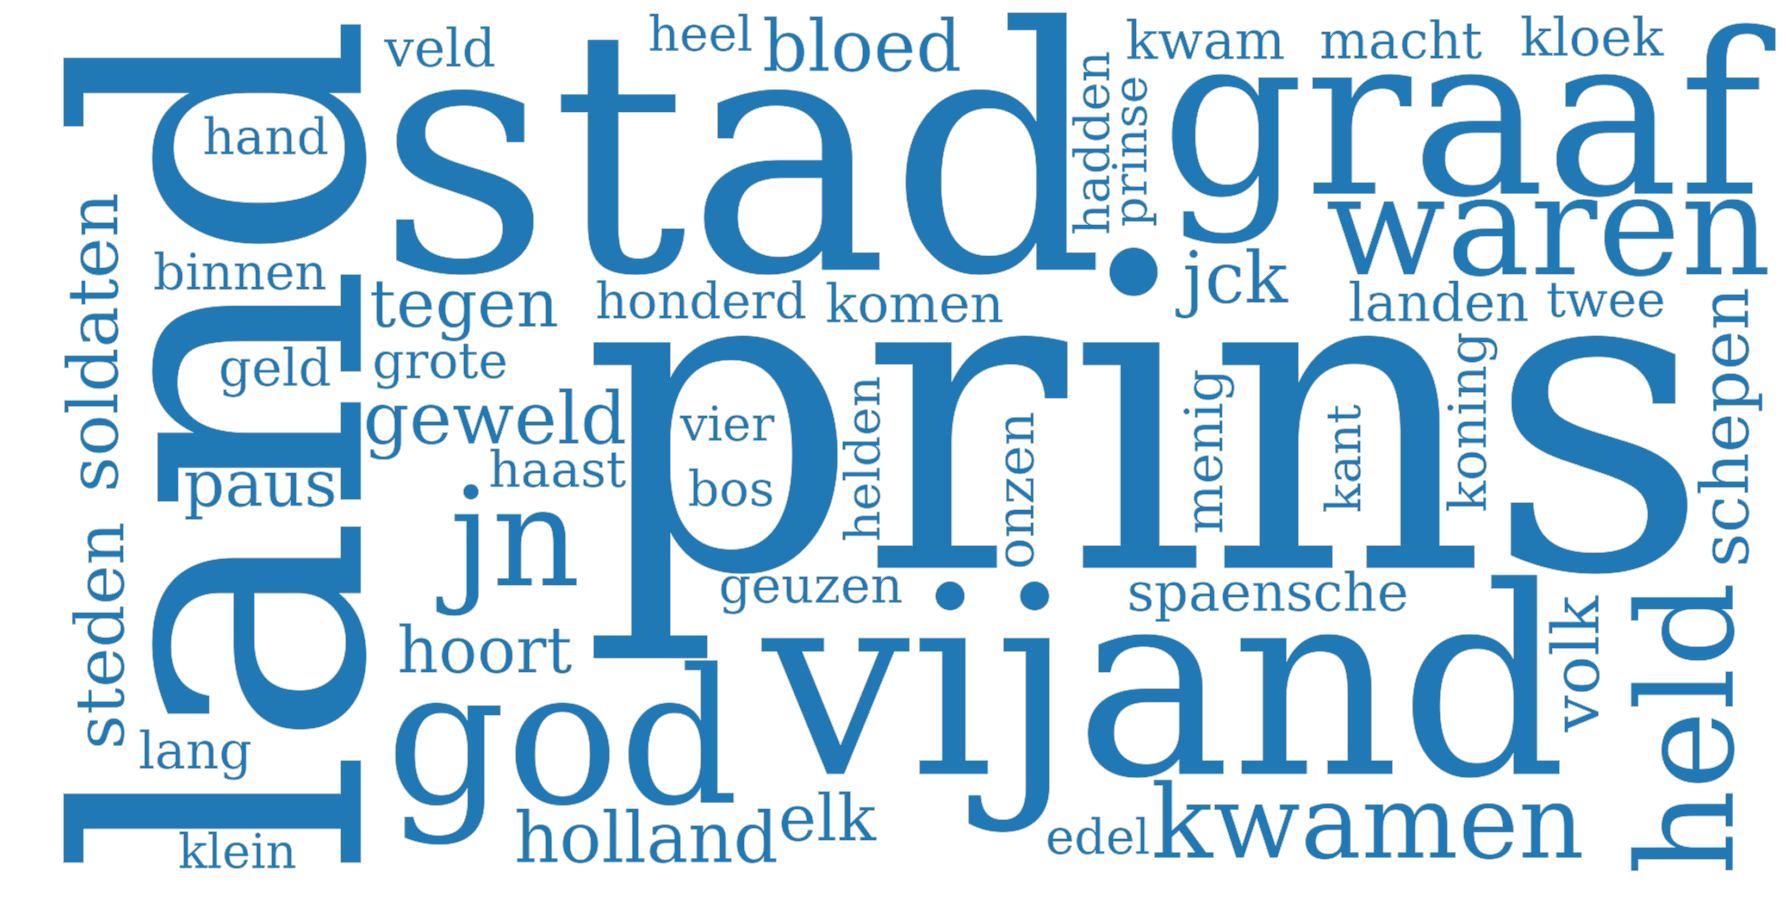

In [11]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

TOPIC_N = 32
NUMBER_OF_WORDS = 50
words = dict(lda.show_topic(TOPIC_N, NUMBER_OF_WORDS))
wc = WordCloud(width=3200, height=1600, background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                              min_font_size=15,
                            font_path="/Users/alielassche/Downloads/DejaVuSerif.ttf", margin=10,
                               color_func=lambda *args, **kwargs: (32,121,180),
                              colormap='tab10')
wc.generate_from_frequencies(words)
plt.figure(figsize=(32,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.savefig('VARD2_topic32.pdf', bbox_inches='tight')